In [1]:
from functions import *

%config InlineBackend.figure_format = 'retina' 

## **Damped Harmonic Oscillator**

Solving the ODE for a damped harmonic oscillator with a "naive" approach and using a PINN.

$$ m \frac{d^2 x}{d t^2}+\gamma \frac{d x}{d t}+k x=0 $$

Example idea from: https://camlab.ethz.ch/teaching/deep-learning-in-scientific-computing-2023.html

### **Naive Approach**

Simply training using some data points. Minimizing the MSE between the model predicition and the data points.

In [2]:
# Initialize the model
model = DampedOscillatorNaive()

# Generate data 
model.generate_data(n_points=10, noise_level=0.0)

# Train the model
model.train(n_epochs=3000)

Using device: cuda
Generated 10 data points covering 6.31 time units
Starting training for 3000 epochs...
Epoch 0/3000, Loss: 2.666044e-01
Epoch 100/3000, Loss: 1.686475e-01
Epoch 200/3000, Loss: 1.023843e-01
Epoch 300/3000, Loss: 8.566765e-02
Epoch 400/3000, Loss: 6.429136e-02
Epoch 500/3000, Loss: 5.056070e-02
Epoch 600/3000, Loss: 4.183626e-02
Epoch 700/3000, Loss: 3.441407e-02
Epoch 800/3000, Loss: 2.382010e-02
Epoch 900/3000, Loss: 2.648904e-03
Epoch 1000/3000, Loss: 1.103200e-03
Epoch 1100/3000, Loss: 8.589431e-04
Epoch 1200/3000, Loss: 7.389099e-04
Epoch 1300/3000, Loss: 6.651681e-04
Epoch 1400/3000, Loss: 6.105310e-04
Epoch 1500/3000, Loss: 5.639500e-04
Epoch 1600/3000, Loss: 5.215785e-04
Epoch 1700/3000, Loss: 4.786871e-04
Epoch 1800/3000, Loss: 4.386871e-04
Epoch 1900/3000, Loss: 3.937749e-04
Epoch 2000/3000, Loss: 3.505307e-04
Epoch 2100/3000, Loss: 3.074677e-04
Epoch 2200/3000, Loss: 2.646697e-04
Epoch 2300/3000, Loss: 2.257870e-04
Epoch 2400/3000, Loss: 1.825902e-04
Epoch 

[0.2666044235229492,
 0.2618665397167206,
 0.257477730512619,
 0.25343048572540283,
 0.24970848858356476,
 0.2462960034608841,
 0.24317626655101776,
 0.24033024907112122,
 0.23773710429668427,
 0.23537540435791016,
 0.233224019408226,
 0.23126272857189178,
 0.22947268187999725,
 0.22783608734607697,
 0.22633595764636993,
 0.22495590150356293,
 0.22368021309375763,
 0.22249384224414825,
 0.22138261795043945,
 0.220333531498909,
 0.21933488547801971,
 0.21837659180164337,
 0.21745018661022186,
 0.21654902398586273,
 0.21566824615001678,
 0.21480484306812286,
 0.21395723521709442,
 0.21312542259693146,
 0.21231018006801605,
 0.2115129679441452,
 0.2107355147600174,
 0.20997925102710724,
 0.20924527943134308,
 0.20853419601917267,
 0.20784588158130646,
 0.2071795016527176,
 0.2065337896347046,
 0.2059069126844406,
 0.20529679954051971,
 0.2047009915113449,
 0.20411701500415802,
 0.20354235172271729,
 0.20297463238239288,
 0.2024117261171341,
 0.2018517702817917,
 0.20129325985908508,
 0.20

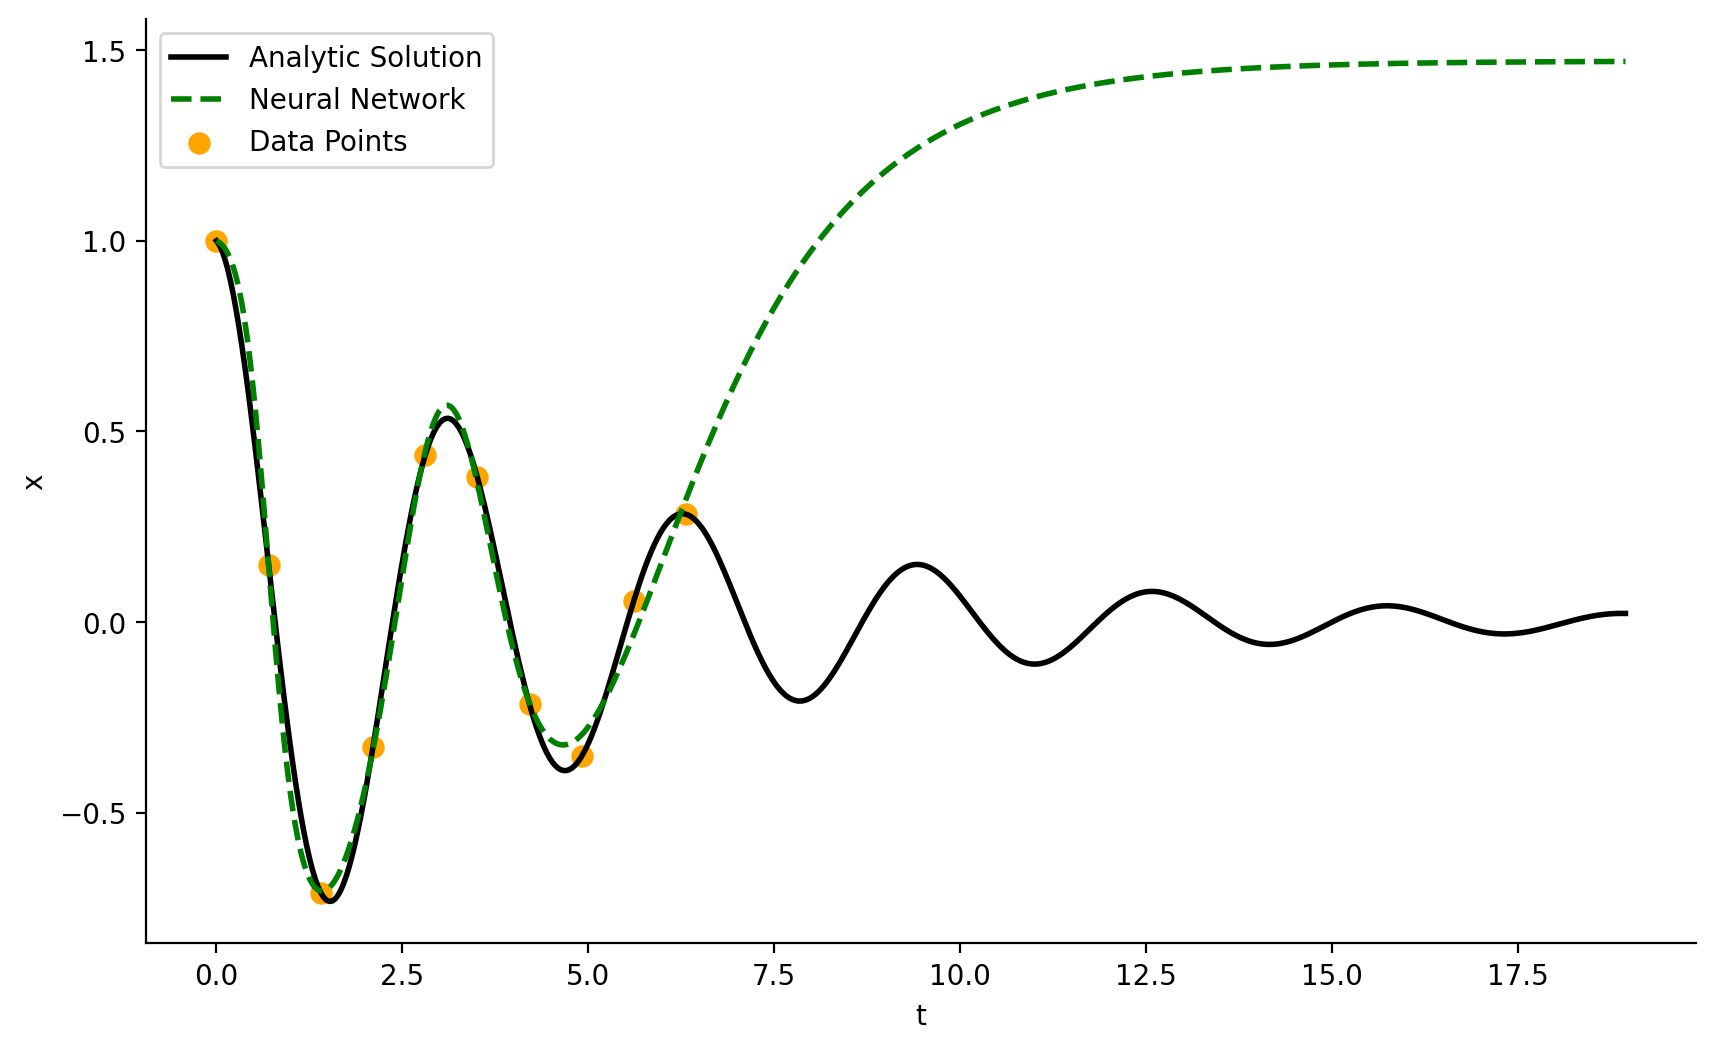

In [3]:
model.visualize()

## **PINN** 

Using a physics-informed neural network.

In [6]:
# Create and initialize the PINN
pinn = DampedOscillatorPINN(n_hidden_layers=2, n_neurons_per_layer=9, activation=nn.Tanh)

# Train the model
losses = pinn.train(adam_epochs=10000)

Using device: cuda
Domain setup: 10000 collocation points, 10 data points
Starting Adam optimization...
Adam - Epoch 0/10000, Loss: 6.084832e+00
Adam - Epoch 100/10000, Loss: 2.429492e+00
Adam - Epoch 200/10000, Loss: 1.718326e+00
Adam - Epoch 300/10000, Loss: 1.552757e+00
Adam - Epoch 400/10000, Loss: 1.394905e+00
Adam - Epoch 500/10000, Loss: 1.188510e+00
Adam - Epoch 600/10000, Loss: 9.263985e-01
Adam - Epoch 700/10000, Loss: 8.164943e-01
Adam - Epoch 800/10000, Loss: 7.637335e-01
Adam - Epoch 900/10000, Loss: 7.180786e-01
Adam - Epoch 1000/10000, Loss: 6.803782e-01
Adam - Epoch 1100/10000, Loss: 6.491556e-01
Adam - Epoch 1200/10000, Loss: 6.237414e-01
Adam - Epoch 1300/10000, Loss: 6.046465e-01
Adam - Epoch 1400/10000, Loss: 5.908093e-01
Adam - Epoch 1500/10000, Loss: 5.803787e-01
Adam - Epoch 1600/10000, Loss: 5.683821e-01
Adam - Epoch 1700/10000, Loss: 5.576732e-01
Adam - Epoch 1800/10000, Loss: 5.522355e-01
Adam - Epoch 1900/10000, Loss: 5.341816e-01
Adam - Epoch 2000/10000, Los

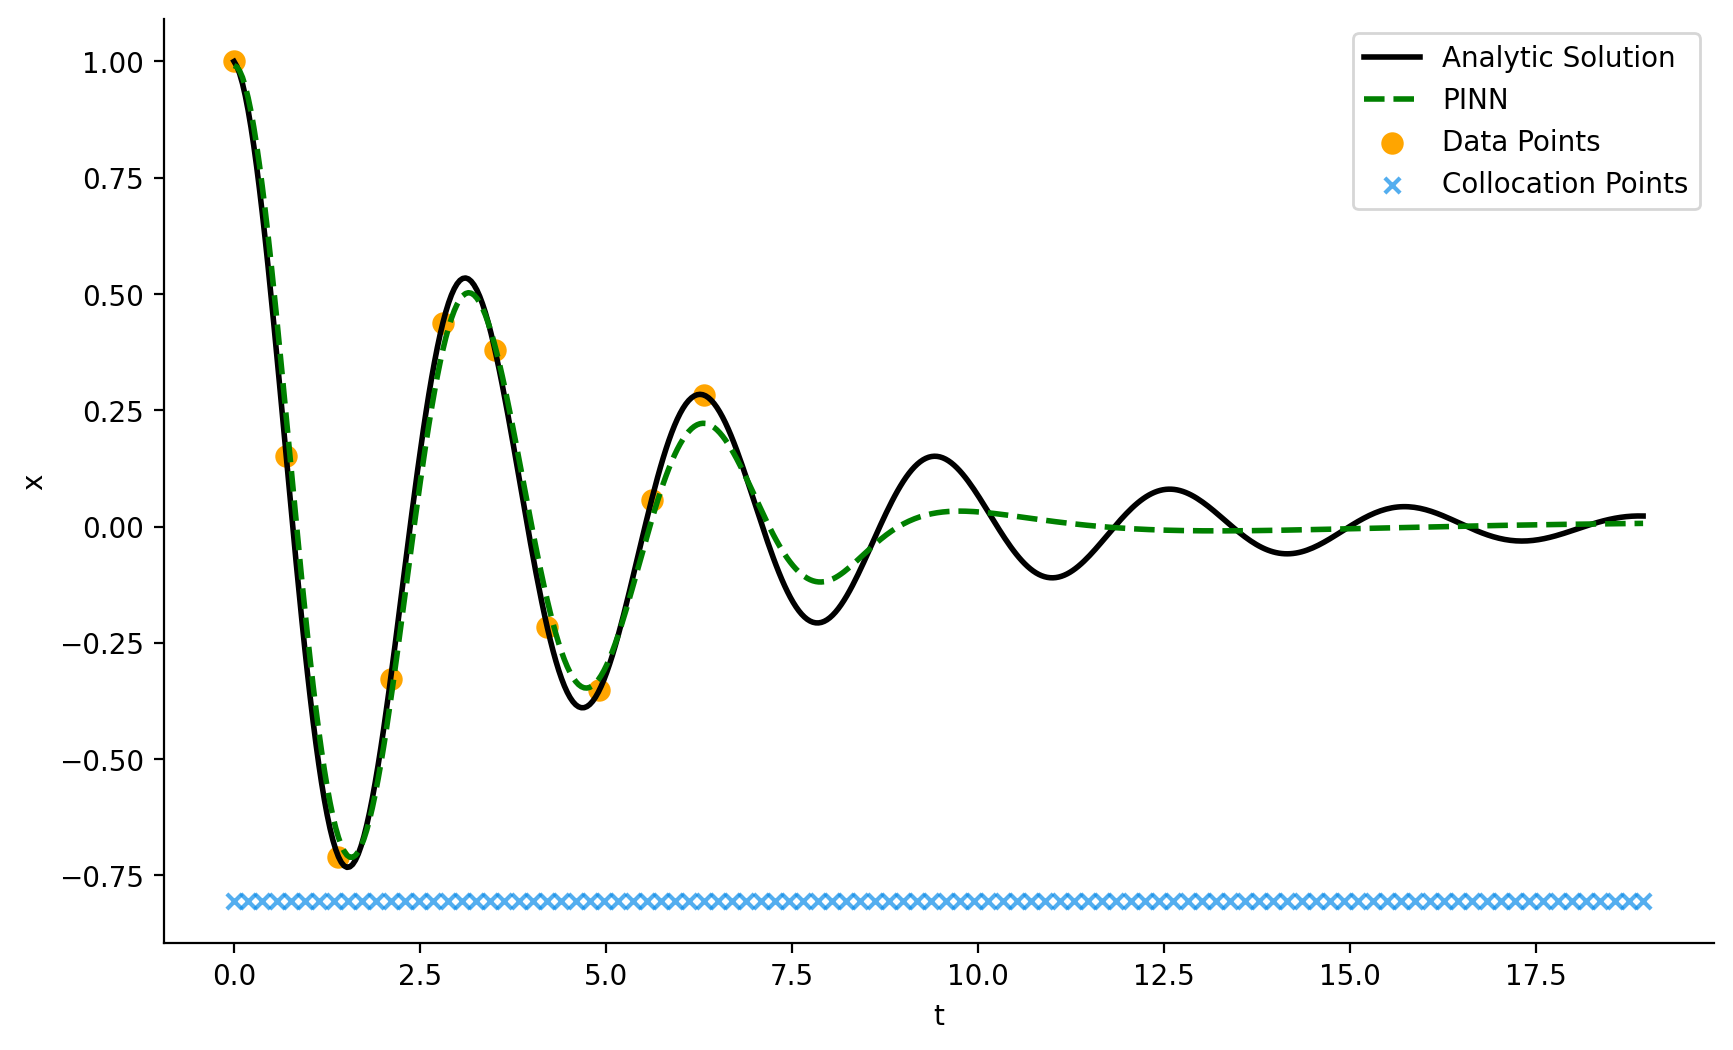

In [7]:
pinn.visualize()